In [2]:
import pandas as pd, json, requests
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [3]:
import json
import pandas as pd

champion_data = {}

with open("../data/championFull copy.json", encoding="utf8") as f:
    data = json.load(f)
    
    for champ_name, champ_data in data['data'].items():
        stats = champ_data['stats']
        info = champ_data['info']
        
        # Merge stats and info dict into single dict
        merged = stats.copy()  
        merged.update(info)
        
        champion_data[champ_name] = merged

# Convert to DataFrame 
print(champion_data.items())

dict_items([('Aatrox', {'hp': 650, 'hpperlevel': 114, 'mp': 0, 'mpperlevel': 0, 'movespeed': 345, 'armor': 38, 'armorperlevel': 4.45, 'spellblock': 32, 'spellblockperlevel': 2.05, 'attackrange': 175, 'hpregen': 3, 'hpregenperlevel': 1, 'mpregen': 0, 'mpregenperlevel': 0, 'crit': 0, 'critperlevel': 0, 'attackdamage': 60, 'attackdamageperlevel': 5, 'attackspeedperlevel': 2.5, 'attackspeed': 0.651, 'attack': 8, 'defense': 4, 'magic': 3, 'difficulty': 4}), ('Ahri', {'hp': 590, 'hpperlevel': 96, 'mp': 418, 'mpperlevel': 25, 'movespeed': 330, 'armor': 21, 'armorperlevel': 4.7, 'spellblock': 30, 'spellblockperlevel': 1.3, 'attackrange': 550, 'hpregen': 2.5, 'hpregenperlevel': 0.6, 'mpregen': 8, 'mpregenperlevel': 0.8, 'crit': 0, 'critperlevel': 0, 'attackdamage': 53, 'attackdamageperlevel': 3, 'attackspeedperlevel': 2.2, 'attackspeed': 0.668, 'attack': 3, 'defense': 4, 'magic': 8, 'difficulty': 5}), ('Akali', {'hp': 570, 'hpperlevel': 119, 'mp': 200, 'mpperlevel': 0, 'movespeed': 345, 'armor'

In [4]:
# Get all actors as an index for a dataframe
index = champion_data.keys()

# Get the genre-counts for each actor in the index
rows = [champion_data[k] for k in index]

# Create the data frame from these rows, with the actors as index
df = pd.DataFrame(rows, index=index)

# Fill NAs with zero, as NA means the actor has not starred in that genre
df = df.fillna(0)

df

,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,spellblockperlevel,attackrange,...,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,attack,defense,magic,difficulty
Aatrox,650,114,0,0.0,345,38,4.45,32,2.05,175,...,0,0,60,5.00,2.500,0.651,8,4,3,4
Ahri,590,96,418,25.0,330,21,4.70,30,1.30,550,...,0,0,53,3.00,2.200,0.668,3,4,8,5
Akali,570,119,200,0.0,345,23,4.70,37,2.05,125,...,0,0,62,3.30,3.200,0.625,5,3,8,7
Akshan,630,107,350,40.0,330,26,4.70,30,1.30,500,...,0,0,52,3.00,4.000,0.638,0,0,0,0
Alistar,685,120,350,40.0,330,47,4.70,32,2.05,125,...,0,0,62,3.75,2.125,0.625,6,9,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zeri,630,110,250,45.0,330,24,4.20,30,1.30,500,...,0,0,53,1.30,2.000,0.658,8,5,3,6
Ziggs,606,106,480,23.5,325,18,4.50,30,1.30,550,...,0,0,55,3.10,2.000,0.656,2,4,9,4
Zilean,574,96,452,50.0,335,24,5.00,30,1.30,550,...,0,0,52,3.00,2.130,0.658,2,5,8,6
Zoe,630,106,425,25.0,340,21,4.70,30,1.30,550,...,0,0,58,3.30,2.500,0.658,1,7,8,5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

Cluster 0:
Rakan
Diana
Irelia
Maokai
Pyke
Cluster 1:
Viego
Viego
Viego
Viego
Viego
Cluster 2:
Leblanc
Sona
Azir
Lulu
Corki
Cluster 3:
Garen
Gnar
Katarina
Sett
Rengar
Cluster 4:
Bard
Ashe
Lucian
Xayah
Lucian
Cluster 5:
Ivern
Syndra
Syndra
Anivia
Karthus
Cluster 6:
Akali
Zed
MonkeyKing
Gangplank
MonkeyKing
Cluster 7:
Vladimir
Vladimir
Vladimir
Vladimir
Vladimir


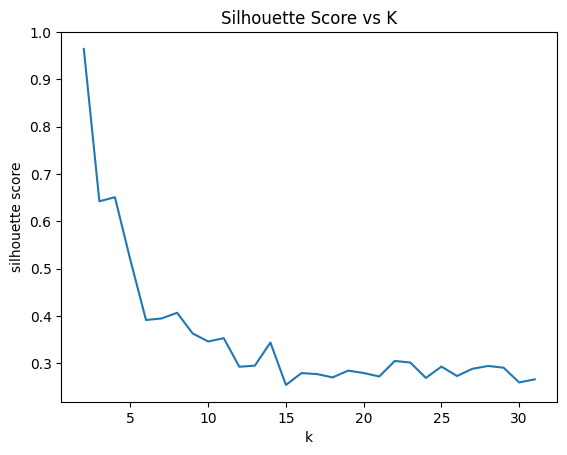

In [5]:
k = 5

cluster_model = KMeans(n_clusters=k)
cluster_model.fit(df)

cluster_labels = cluster_model.predict(df)
champion_cluster_df = pd.DataFrame(cluster_labels, index=df.index, columns=["cluster"])
champion_cluster_df["cluster"].value_counts()
scores = []
for k in range(2, 32):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    scores.append((k, score))
  
ks, scores = zip(*scores)
plt.plot(ks, scores)
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette Score vs K')

k = 8
kmeans = KMeans(n_clusters=k).fit(df) 
for i in range(k):
    cluster_df = df[kmeans.labels_==i] 
    print(f'Cluster {i}:') 
    for j in range(5):
        print(cluster_df.sample(1).index[0])